In [141]:
import os  
#Wir installieren das os-Modul, um das Arbeitsverzeichnis zu ändern
import numpy as np   
#Wir installieren das numpy-Paket, das uns hilft, fortgeschrittene mathematische Operationen durchzuführen.
import pandas as pd   
#Mit dem Pandas-Paket werden die Phasen Datenlesen, Datenvorverarbeitung und Datenbereinigung durchgeführt.
from scipy.stats import chi2_contingency   
#Wir laden das entsprechende Modul, um die Chi-Quadrat-Analyse durchzuführen.
import warnings   
#Wir verwenden dieses Modul, um zu vermeiden, dass während unserer Arbeit einige Warnungen angezeigt werden.
import sklearn
#Wir installieren das sklearn-Paket, um die entsprechenden Algorithmen der künstlichen Intelligenz zu implementieren.
warnings.filterwarnings('ignore') 
import missingno as msno   
#Es ist das Paket, mit dem wir die fehlenden Daten in unserem Datensatz visualisieren können.

#Einige Python-Pakete, die wir für die Datenvisualisierung verwenden
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [142]:
os.chdir("C:/Users/PC/Desktop/Yeni klasör (2)") # Wir legen unser Arbeitsverzeichnis fest.
df = pd.read_csv("Placement_Data_Full_Class.csv", low_memory=False) #Wir lesen den Datensatz
df=pd.DataFrame(df)

In [143]:
df.head(10) #Wir lesen die ersten 10 Zeilen in unserem Datensatz.

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [144]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [145]:
df.shape #Wir lernen die Dimensionen unseres Datensatzes kennen.

(215, 15)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


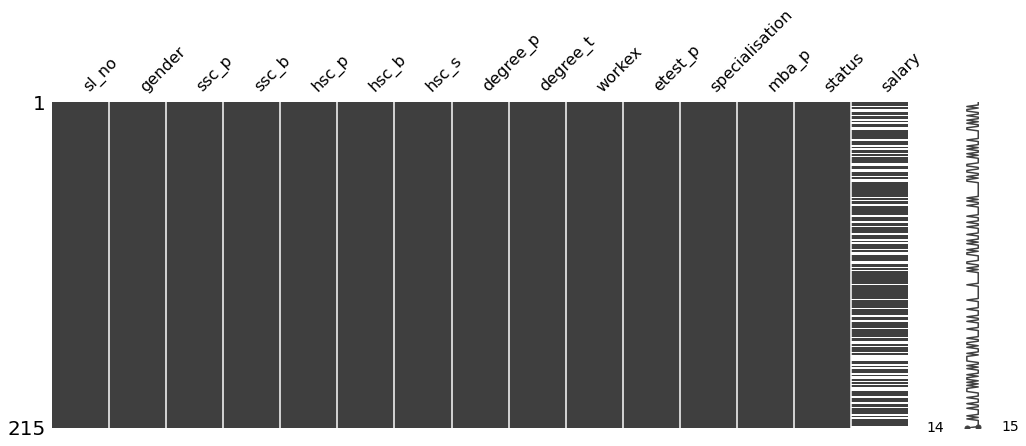

In [147]:
msno.matrix(df) #Wir visualisieren fehlende Daten.
figure = plt.gcf() 
figure.set_size_inches(17, 6)
# plt.savefig('sidfsa_function.jpg', dpi = 200)

In [148]:
#Wir haben die Spalte mit den Seriennummern der Schüler gelöscht, da wir sie nicht benötigen.
df=df.drop("sl_no",axis=1)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [150]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [151]:
df[(df['gender'] == 'M')].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,139.000000,139.000000,139.000000,139.000000,139.000000,100.000000
mean,66.752518,66.161655,65.429856,72.926115,60.984892,298910.000000
std,10.429150,10.865579,6.748840,13.213727,5.750263,99514.792058
min,41.000000,39.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.200000,61.000000,60.450000,61.140000,56.875000,250000.000000
50%,65.000000,65.000000,65.000000,72.000000,60.440000,270000.000000
75%,74.000000,73.000000,70.100000,84.135000,64.245000,300000.000000
max,89.400000,97.700000,83.000000,97.400000,77.890000,940000.000000


In [152]:
df[(df['gender'] == 'F')].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,76.000000,76.000000,76.000000,76.000000,76.000000,48.000000
mean,68.310921,66.646842,68.090000,70.590658,64.643553,267291.666667
std,11.522542,11.021048,8.128285,13.343943,5.242545,75948.178955
min,40.890000,37.000000,50.200000,50.000000,53.290000,200000.000000
25%,62.500000,60.000000,64.000000,58.765000,60.710000,219500.000000
50%,69.750000,64.600000,67.700000,69.000000,64.805000,250000.000000
75%,77.000000,73.000000,73.000000,80.000000,68.675000,300000.000000
max,88.000000,97.000000,91.000000,98.000000,76.180000,650000.000000


In [153]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [154]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [155]:
print("Gender")
print(df["gender"].value_counts())
print("-")
print("Specialization in Higher Secondary Education")
print(df["hsc_s"].value_counts())
print("-")
print("Under Graduation(Degree type)")
print(df["degree_t"].value_counts())
print("-")
print("Post Graduation(MBA)- Specialization")
print(df["specialisation"].value_counts())
print("-")
print("Status of placement")
print(df["status"].value_counts())

Gender
M    139
F     76
Name: gender, dtype: int64
-
Specialization in Higher Secondary Education
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64
-
Under Graduation(Degree type)
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
-
Post Graduation(MBA)- Specialization
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
-
Status of placement
Placed        148
Not Placed     67
Name: status, dtype: int64


Wir haben die Werte der Geschlechterspalte in unserem Datensatz mit der Pie-Funktion angezeigt.

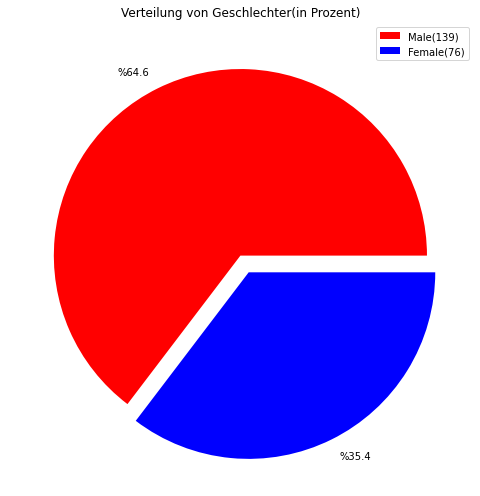

In [156]:
plt.rcParams["figure.figsize"] = [9, 7]
plt.rcParams["figure.autolayout"] = True
hh = ['%64.6', '%35.4']
labels = ['Male(139)', 'Female(76)']
sizes = [139, 76]
colors = ['red', 'blue']

patches, texts = plt.pie(sizes, labels=hh, colors=colors, explode=(0,0.1))
plt.legend(patches, labels, loc="best")

plt.title("Verteilung von Geschlechter(in Prozent)")
plt.savefig('out3.jpg', dpi = 500, quality=95)

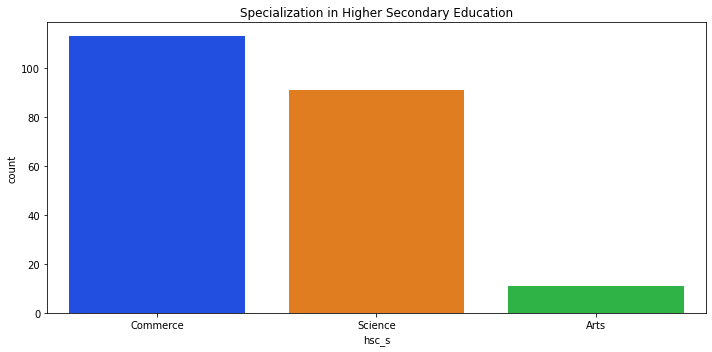

In [157]:
plt.figure(figsize=(10,5))
sns.countplot(x='hsc_s', palette='bright',  data=df)
plt.title("Specialization in Higher Secondary Education")
plt.savefig('sinadfdd_function.jpg', dpi = 500)

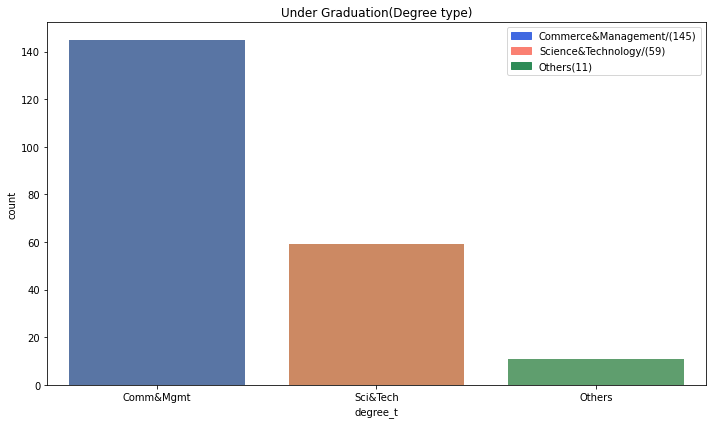

In [158]:
plt.figure(figsize=(10,6))
sns.countplot(x="degree_t", data=df, palette="deep",
              order=df.degree_t.value_counts().iloc[:3].index)
blue_patch = mpatches.Patch(color='royalblue', label='Commerce&Management/(145)')
salmon_patch = mpatches.Patch(color='salmon', label='Science&Technology/(59)')
green_patch = mpatches.Patch(color='seagreen', label='Others(11)')

plt.legend(handles=[blue_patch, salmon_patch, green_patch])
plt.title("Under Graduation(Degree type)")
plt.savefig('sdfsn_function.jpg', dpi = 500, quality=200)

Text(0.5, 1.0, 'Post Graduation(MBA)- Specialization')

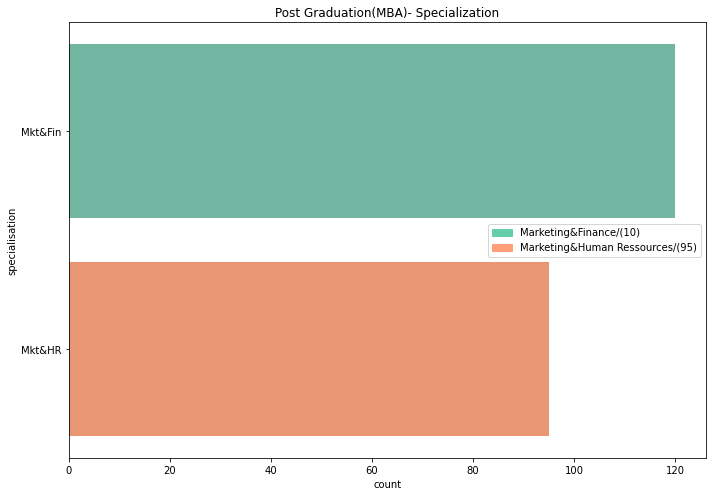

In [159]:
plt.figure(figsize=(10,7))
sns.countplot(y="specialisation", data=df, palette="Set2",
              order=df.specialisation.value_counts().iloc[:3].index)
blue_patch = mpatches.Patch(color='mediumaquamarine', label='Marketing&Finance/(10)')
salmon_patch = mpatches.Patch(color='lightsalmon', label='Marketing&Human Ressources/(95)')

plt.legend(handles=[blue_patch, salmon_patch])
plt.title("Post Graduation(MBA)- Specialization")
# plt.savefig('sdfsn_function.jpg', dpi = 500, quality=95)

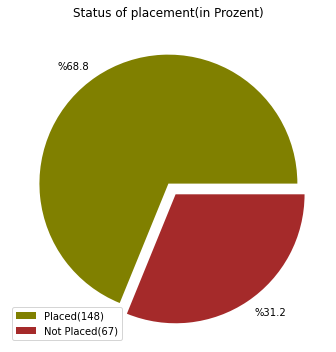

In [160]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True
hh = ['%68.8', '%31.2']
labels = ['Placed(148)', 'Not Placed(67)']
sizes = [148, 67]
colors = ['olive', 'brown']

patches, texts = plt.pie(sizes, labels=hh, colors=colors, explode=(0,0.1))
plt.legend(patches, labels, loc="best")

plt.title("Status of placement(in Prozent)")
plt.savefig('out3.jpg', dpi = 500, quality=95)

Stellenvermittlungsstatus der Studierenden nach Geschlecht

<AxesSubplot:>

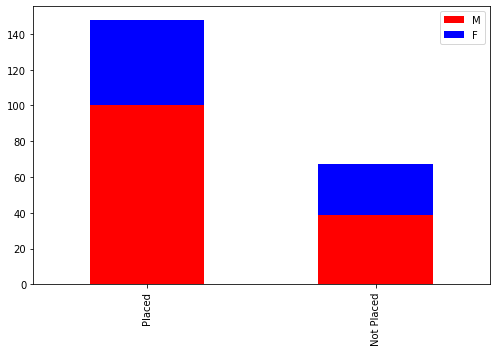

In [161]:
plt.rcParams["figure.figsize"] = [7, 5]
colors = ["r", "b","k"]
Placed_ = df[df["status"]== "Placed"]["gender"].value_counts()
Noplaced_ = df[df["status"]=="Not Placed"]["gender"].value_counts()
df_ = pd.DataFrame([Placed_, Noplaced_])
df_.index = ["Placed","Not Placed"]
df_.plot.bar(stacked=True,color=colors)

Text(0.5, 0, 'Erfolgsprozentsatz der Sekundarstufe')

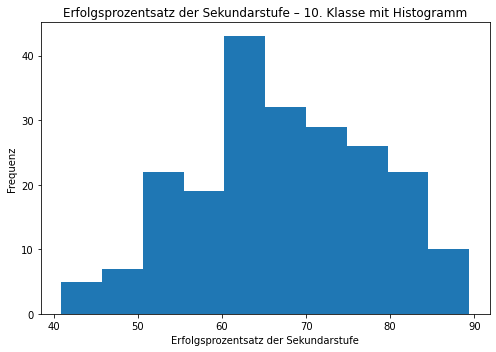

In [162]:
plt.hist(df['ssc_p'])
plt.title("Erfolgsprozentsatz der Sekundarstufe – 10. Klasse mit Histogramm")
plt.ylabel("Frequenz", fontsize='10')
plt.xlabel("Erfolgsprozentsatz der Sekundarstufe", fontsize='10')

Text(0.5, 0, 'Erfolgsprozentsatz der höheren Sekundarstufe')

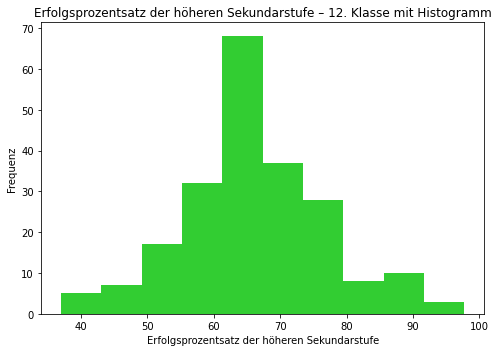

In [163]:
plt.hist(df['hsc_p'], color = "limegreen")
plt.title("Erfolgsprozentsatz der höheren Sekundarstufe – 12. Klasse mit Histogramm")
plt.ylabel("Frequenz", fontsize='10')
plt.xlabel("Erfolgsprozentsatz der höheren Sekundarstufe", fontsize='10')

Text(0.5, 0, 'Prozentsatz des Universitätserfolgs')

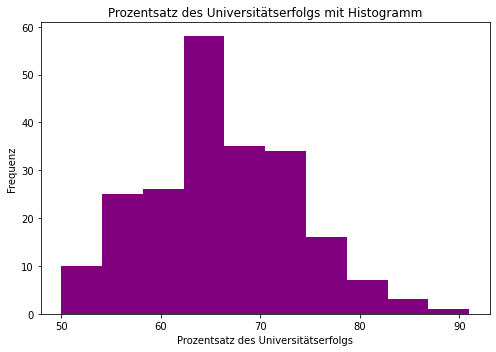

In [164]:
plt.hist(df['degree_p'], color = "purple")
plt.title("Prozentsatz des Universitätserfolgs mit Histogramm")
plt.ylabel("Frequenz", fontsize='10')
plt.xlabel("Prozentsatz des Universitätserfolgs", fontsize='10')

Text(0.5, 0, 'MBA-Erfolgsprozentsatz')

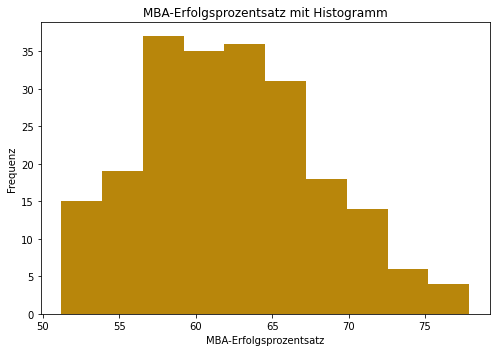

In [165]:
plt.hist(df['mba_p'], color = "darkgoldenrod")
plt.title("MBA-Erfolgsprozentsatz mit Histogramm")
plt.ylabel("Frequenz", fontsize='10')
plt.xlabel("MBA-Erfolgsprozentsatz", fontsize='10')

Korrelations-Heatmap unseres Datensatzes (mit Zellwerten)

<AxesSubplot:>

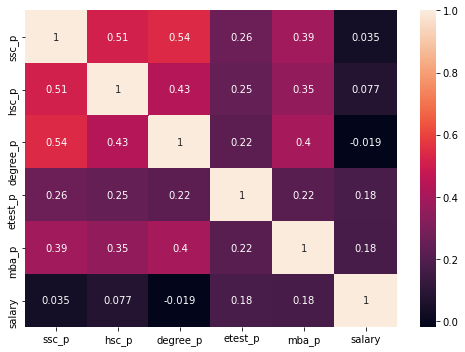

In [166]:
sns.heatmap(df.corr(),annot=True)

In diesem Abschnitt führen wir die statistische Chi-Quadrat-Analyse durch.

In [225]:
#Wir haben unseren Datenrahmen eingerichtet, um den Chi-Quadrat-Test auszuführen.
a = df.iloc[:, [0,8]].values
a = pd.DataFrame(a, columns=['gender', 'work_experience' ])
a.head()

,gender,work_experience
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [168]:
#Der einfachste Weg, den Chi-Quadrat-Test auszuführen, besteht darin, 
#die Daten in eine Kontingenztabelle mit Häufigkeiten umzuwandeln. 
#Wir werden den crostab-Befehl der Pandas-Bibliothek verwenden.
contigency= pd.crosstab(a['gender'], a['work_experience'])
contigency

work_experience,No,Yes
gender,,
F,54,22
M,87,52


In [169]:
contigency_pct = pd.crosstab(a['gender'], a['work_experience'], normalize='index')
contigency_pct

work_experience,No,Yes
gender,,
F,0.710526,0.289474
M,0.625899,0.374101


<AxesSubplot:xlabel='work_experience', ylabel='gender'>

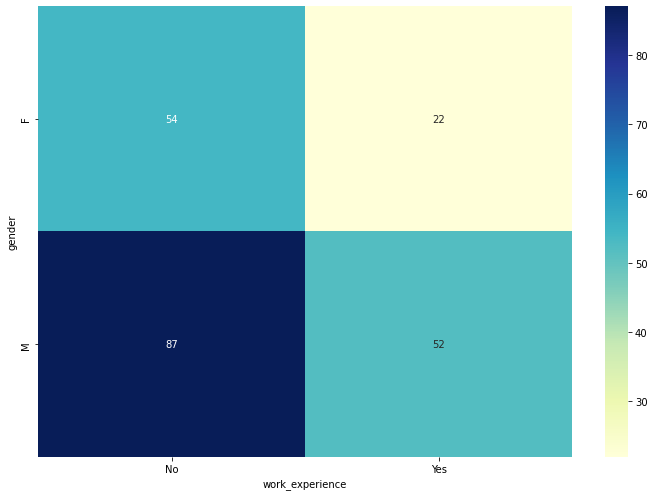

In [226]:
#Eine einfache Möglichkeit, Notfalldiagramme visuell anzuzeigen, sind Heatmaps.
plt.figure(figsize=(10,7)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [229]:
#Und wir finden die Teststatistik der Chi-Quadrat-Analyse.
from scipy.stats import chi2_contingency

# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency)
# Print the p-value

Wie zu sehen ist, ist der p-Wert größer als 0,05. 
Das bedeutet: Es gibt keinen signifikanten Unterschied zwischen männlichen und weiblichen Studierenden mit Berufserfahrung. 
H-Nullhypothese ist wahr.

In [228]:
print(p)

0.2720101906282858


HIER BEGINNEN WIR DIE VORBEARBEITUNGSSCHRITTE FÜR KÜNSTLICHE INTELLIGENZ-ALGORITHMEN

Wir führen Datenvorverarbeitung für logistische Regression und Random Forest-Algorithmen durch.

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
df.salary=df.salary.fillna(df.salary.mean())

In [181]:
colums=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]



In [182]:
for i in colums:
    df[i]=LabelEncoder().fit_transform(df[i])

In [184]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [186]:
# Wir löschen auch "salary", da wir sie nicht benötigen.
del df['salary'] 

HIER BEGINNEN WIR DIE VORBEARBEITUNGSSCHRITTE FÜR KÜNSTLICHE INTELLIGENZ-ALGORITHMEN

In [217]:
#Wir passen unsere unabhängigen und Zielvariablen an.
x = df.iloc[:, [1,3]].values
y = df.iloc[:, 12].values

In [218]:
#Wir trennen unser Trainings- und Test-Dataset.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 0)

In [219]:
#Wir werden die Feature-Skalierung implementieren, um unsere Argumente auf die Standardeinheitsebene zu bringen.
#Auf diese Weise läuft das Modell reibungslos.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

HIER HABEN WIR DEN LOGISTIK-REGRESSIONS-ALGORITHMUS DURCHFÜHRT

In [196]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [197]:
#Schätzen des Testsatzes
y_pred = classifier.predict(x_test)

In [198]:
#Eine der Methoden, um die Richtigkeit unserer Klassifizierung zu überprüfen, 
#besteht darin, eine Fehlermatrix zu erstellen. 
#Für die Fehlermatrix verwenden wir die scikit-learn-Bibliotheksmetrik-Modul-Funktion Confusion_matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  9]
 [ 6 53]]


Die obigen 18 und 53 geben die Anzahl der korrekten Klassifikationen
und 6 und 9 die Anzahl der falschen Klassifikationen an.

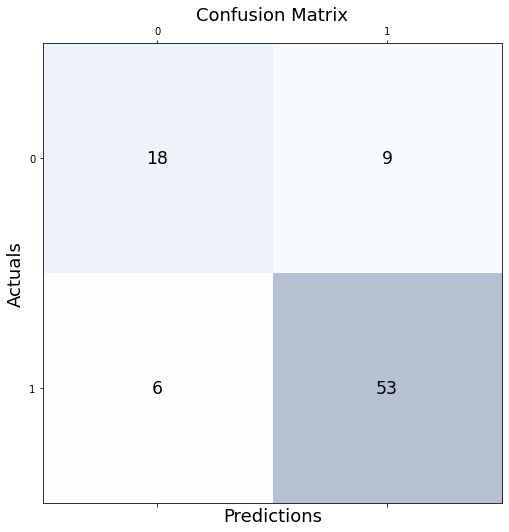

In [199]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Bewertung der Modellleistung

In [200]:
#Wie Sie sehen können, liegen die Präzisions- und Genauigkeitswerte über 0,80. 
#Das bedeutet: Das Modell kann bearbeitet werden.
prediction = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        27
           1       0.85      0.90      0.88        59

    accuracy                           0.83        86
   macro avg       0.80      0.78      0.79        86
weighted avg       0.82      0.83      0.82        86



# Wir visualisieren unseren Testdatensatz.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


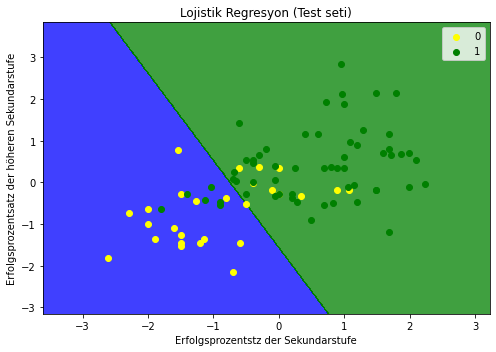

In [201]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Lojistik Regresyon (Test seti)')
plt.xlabel('Erfolgsprozentstz der Sekundarstufe')
plt.ylabel('Erfolgsprozentsatz der höheren Sekundarstufe')
plt.legend()
plt.show()

HIER HABEN WIR RANDOMFOREST-ALGORITHMUS GENOMMEN.

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)

In [222]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [223]:
pred = classifier.predict(x_test)

In [224]:
#Wie Sie sehen können, liegen die Präzisions- und Genauigkeitswerte über 0,80. 
#Das bedeutet: Das Modell kann bearbeitet werden.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        27
           1       0.85      0.90      0.88        59

    accuracy                           0.83        86
   macro avg       0.80      0.78      0.79        86
weighted avg       0.82      0.83      0.82        86

